In [7]:
!pip install pandas
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Automobile_data.csv to Automobile_data.csv


In [29]:
df = pd.read_csv('Automobile_data.csv')

In [30]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [24]:
import seaborn as sns

UNIVARIATE ANALYSIS

<Axes: xlabel='make', ylabel='count'>

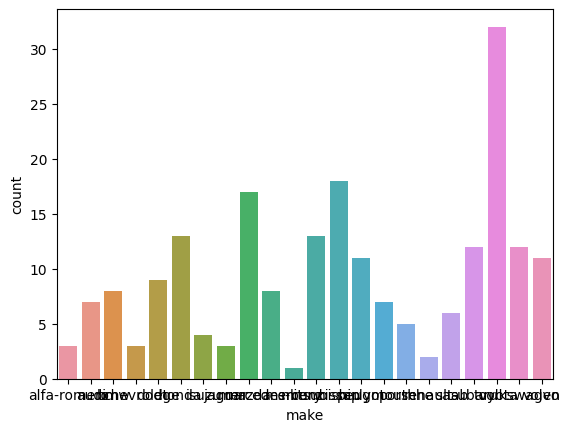

In [ ]:
sns.countplot(x=df['make'])

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='wheel-base'>

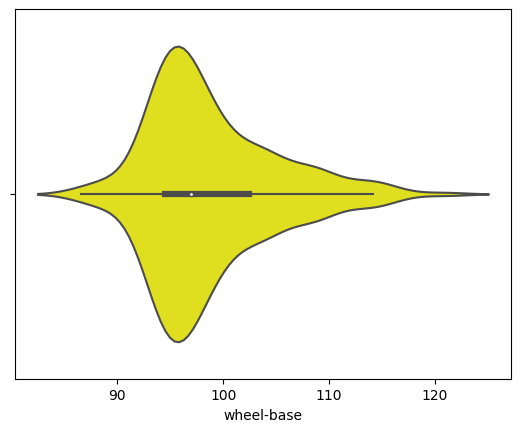

In [ ]:
sns.violinplot(x='wheel-base',data=df,color='yellow')

BIVARIATE ANALYSIS

<Axes: xlabel='engine-type', ylabel='engine-size'>

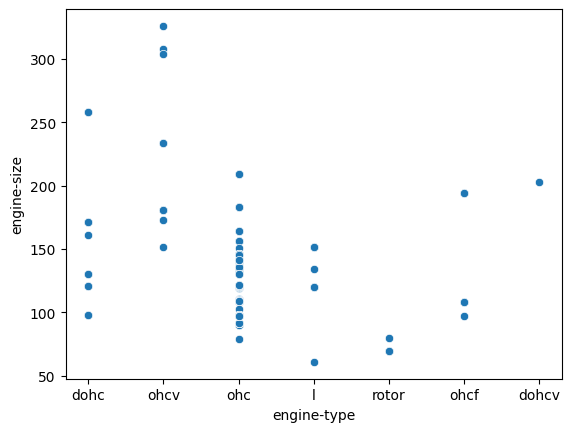

In [ ]:
sns.scatterplot(x='engine-type', y='engine-size', data=df)

<Axes: xlabel='body-style', ylabel='length'>

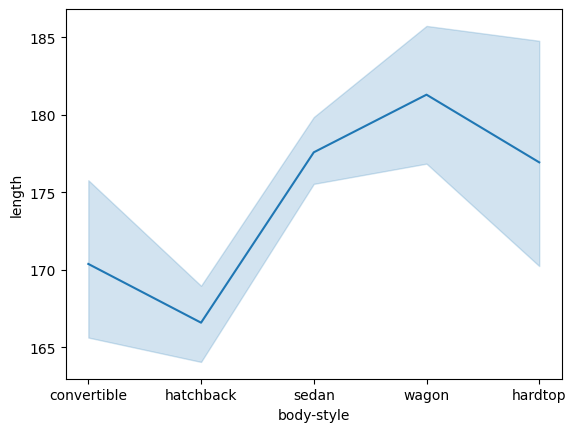

In [ ]:
sns.lineplot(x='body-style', y='length', data=df)

Multivariate Analysis

<ipython-input-30-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

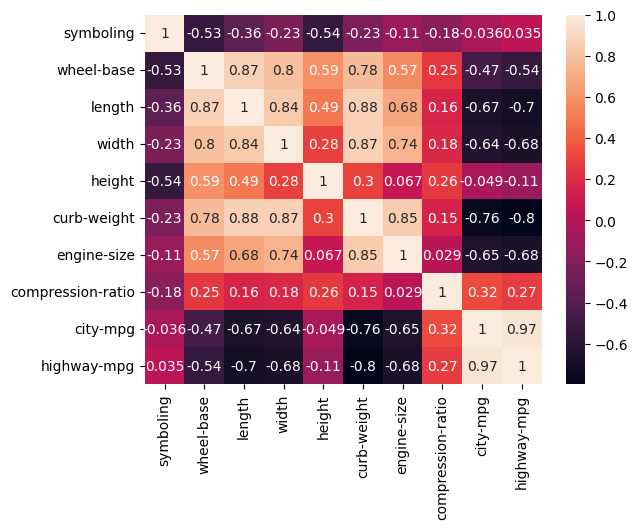

In [ ]:
sns.heatmap(df.corr(), annot=True)

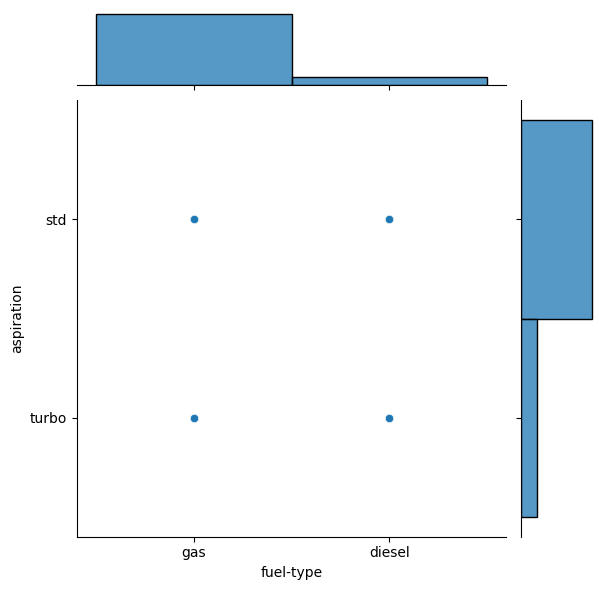

In [ ]:
sns.jointplot(x='fuel-type', y='aspiration', data=df)

In [33]:
sns.set_style("whitegrid")

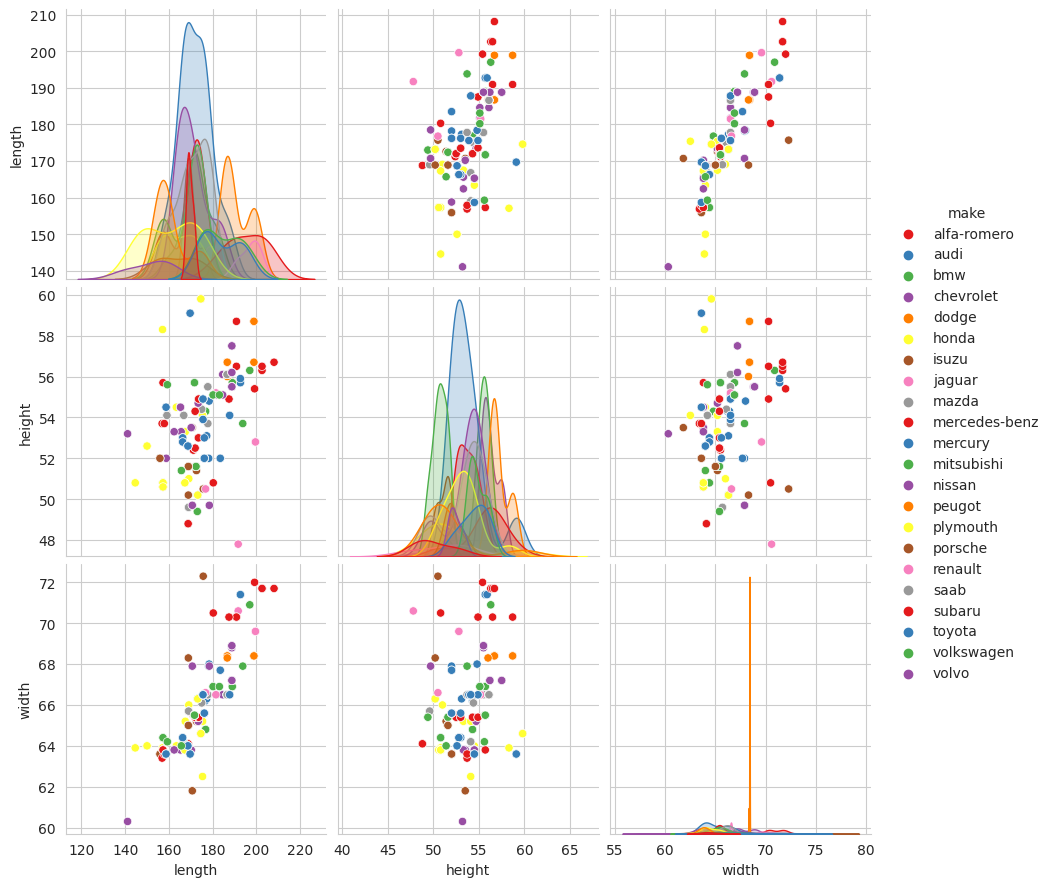

In [35]:
sns.pairplot(
    df[["length", "height", "width", "make"]],
    hue = "make",
    height = 3,
    palette = "Set1")

 Handling missing values

In [51]:
df.replace("?", np.nan, inplace = True)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [52]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [ ]:
#replacing missing values with average value

avgnorm = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avgnorm, inplace=True) 

avgbore = df["bore"].astype("float").mean(axis=0)
df["bore"].replace(np.nan, avgbore, inplace=True)
avgstroke = df["stroke"].astype("float").mean(axis=0)
df["stroke"].replace(np.nan, avgstroke, inplace=True)  
avghp = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, avghp, inplace=True)  
avgpeak = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, avgpeak, inplace=True)  
avgprice = df["price"].astype("float").mean(axis=0)
df["price"].replace(np.nan, avgprice, inplace=True)  


In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
x='unknown'
df["num-of-doors"].replace(np.nan,x, inplace=True)

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

 Handling categorical variables(Encoding)

In [11]:
df = pd.read_csv('Automobile_data.csv')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
df['make_1'] = le.fit_transform(df['make'])
df['fuel-type_1'] = le.fit_transform(df['fuel-type'])
df['engine-type_1'] = le.fit_transform(df['engine-type'])
df['body-style_1'] = le.fit_transform(df['body-style'])
df['drive-wheels_1'] = le.fit_transform(df['drive-wheels'])


In [14]:
print(df.head)

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  horsepower  \
0  convertible          rwd           front        88.6  ...         111   
1  convertible          rwd           front        88.6  ...         111   
2    hatchback          rwd           front        94.5  ...         154   
3        sedan          fwd           front        99.8  ...         102   
4        sedan          4wd           front        99.4  ...         115   

   peak-rpm  city-mpg  highway-mpg  price make_1  fuel-t

Performing Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=pd.DataFrame({'wheel-base':[88.6,99.8,99.4,105.8,101.2,88.4,93.7,96.5,113,102,98.8,102.7,93,96.3,99.2,93.3,95.7,102.4,104.5,97.3]})
df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

In [19]:
print(df_standardized.head())

   wheel-base
0   -1.746111
1    0.213452
2    0.143468
3    1.263219
4    0.458398


Correlation and Descriptive Analysis

In [21]:
df=pd.DataFrame({'length':[168.8,171.2,176.6,192.7,178.2,176.8,189,197],
                 'width':[64.1,65.5,66.2,66.4,71.4,67.9,64.8,66.9],
                 'height':[48.8,52.4,54.3,55.7,52,56.3,47.8,50.2]})


In [22]:
corr_matrix = df.corr()

<Axes: >

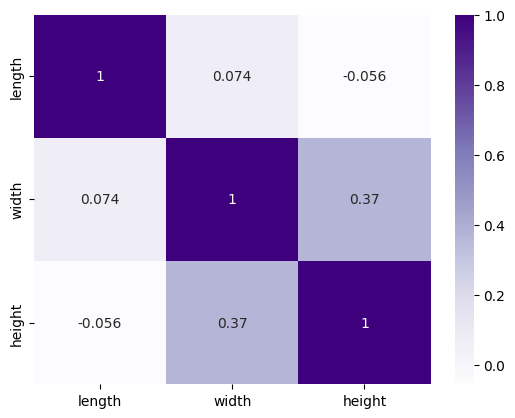

In [27]:
sns.heatmap(corr_matrix, annot=True, cmap='Purples')

In [28]:
df.describe()

,length,width,height
count,8.000000,8.000000,8.000000
mean,181.287500,66.650000,52.187500
std,10.322989,2.258318,3.127499
min,168.800000,64.100000,47.800000
25%,175.250000,65.325000,49.850000
50%,177.500000,66.300000,52.200000
75%,189.925000,67.150000,54.650000
max,197.000000,71.400000,56.300000


Building Machine Learning Model

In [66]:
df=pd.DataFrame({'price':[13495,16500,13950,17450,17710,16430,24565],
                 'engine-size':[130,109,136,131,164,90,79]})

In [67]:
y=df['price']

In [70]:
X = df.drop("price", axis = 1)

In [63]:
df["engine-size"] = [float(str(i)) for i in df["engine-size"]]

In [64]:
df["price"] = [float(str(i)) for i in df["price"]]

In [39]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.50, 
    random_state = 1)

In [41]:
from sklearn.linear_model import LinearRegression

In [73]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Evaluating Machine Learning Model

In [78]:
from sklearn.metrics import mean_squared_error
import math

In [76]:
y_pred = lr.predict(X_test)

In [82]:
print("our model predicts with the deviation of ",math.sqrt(mean_squared_error(y_test, y_pred)))

our model predicts with the deviation of  4830.196040619819
